In [25]:
import os.path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
# Ensure the file exists
if  not os.path.exists("movies.csv"):
    print("Missing dataset file")


In [27]:
movies = pd.read_csv('movies.csv',  encoding='latin-1')

In [28]:
movies.head(5)

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
0,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
2,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
3,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
4,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [29]:
movies.shape

(6820, 15)

In [30]:
movies.isnull().sum()

budget      0
company     0
country     0
director    0
genre       0
gross       0
name        0
rating      0
released    0
runtime     0
score       0
star        0
votes       0
writer      0
year        0
dtype: int64

In [31]:
movies['index_Date'] = movies['released']
movies = movies.set_index('index_Date')
#movies['released'] = movies.set_index('index_Date')
#movies.groupby(movies['released'].dt.month).mean().plot()
movies.head()

,budget,company,country,director,genre,gross,name,rating,released,runtime,score,star,votes,writer,year
index_Date,,,,,,,,,,,,,,,
1986-08-22,8000000.0,Columbia Pictures Corporation,USA,Rob Reiner,Adventure,52287414.0,Stand by Me,R,1986-08-22,89,8.1,Wil Wheaton,299174,Stephen King,1986
1986-06-11,6000000.0,Paramount Pictures,USA,John Hughes,Comedy,70136369.0,Ferris Bueller's Day Off,PG-13,1986-06-11,103,7.8,Matthew Broderick,264740,John Hughes,1986
1986-05-16,15000000.0,Paramount Pictures,USA,Tony Scott,Action,179800601.0,Top Gun,PG,1986-05-16,110,6.9,Tom Cruise,236909,Jim Cash,1986
1986-07-18,18500000.0,Twentieth Century Fox Film Corporation,USA,James Cameron,Action,85160248.0,Aliens,R,1986-07-18,137,8.4,Sigourney Weaver,540152,James Cameron,1986
1986-08-01,9000000.0,Walt Disney Pictures,USA,Randal Kleiser,Adventure,18564613.0,Flight of the Navigator,PG,1986-08-01,90,6.9,Joey Cramer,36636,Mark H. Baker,1986


In [38]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6820 entries, 1986-08-22 to 2017-07-28
Data columns (total 15 columns):
budget      6820 non-null float64
company     6820 non-null object
country     6820 non-null object
director    6820 non-null object
genre       6820 non-null object
gross       6820 non-null float64
name        6820 non-null object
rating      6820 non-null object
released    6820 non-null object
runtime     6820 non-null int64
score       6820 non-null float64
star        6820 non-null object
votes       6820 non-null int64
writer      6820 non-null object
year        6820 non-null int64
dtypes: float64(3), int64(3), object(9)
memory usage: 852.5+ KB


In [112]:
int(math.floor(movies['budget']))

NameError: name 'math' is not defined

In [40]:

movies['released'] = pd.to_datetime(movies['released'])
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6820 entries, 1986-08-22 to 2017-07-28
Data columns (total 15 columns):
budget      6820 non-null float64
company     6820 non-null object
country     6820 non-null object
director    6820 non-null object
genre       6820 non-null object
gross       6820 non-null float64
name        6820 non-null object
rating      6820 non-null object
released    6820 non-null datetime64[ns]
runtime     6820 non-null int64
score       6820 non-null float64
star        6820 non-null object
votes       6820 non-null int64
writer      6820 non-null object
year        6820 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(3), object(8)
memory usage: 852.5+ KB


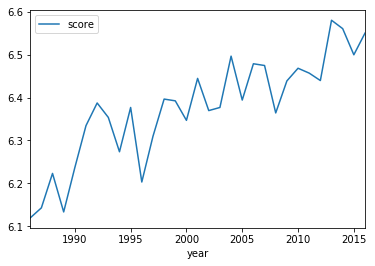

In [95]:
averagescore = movies.groupby(['year'])[['score']].mean()
averagescore.plot()

In [53]:
movies['score'].mean()

6.374897360703794

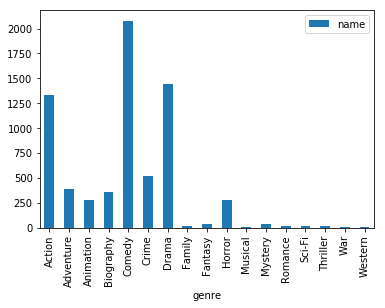

In [79]:
popgenre = movies.groupby(['genre'])[['name']].count()
popgenre.plot(kind = 'bar')

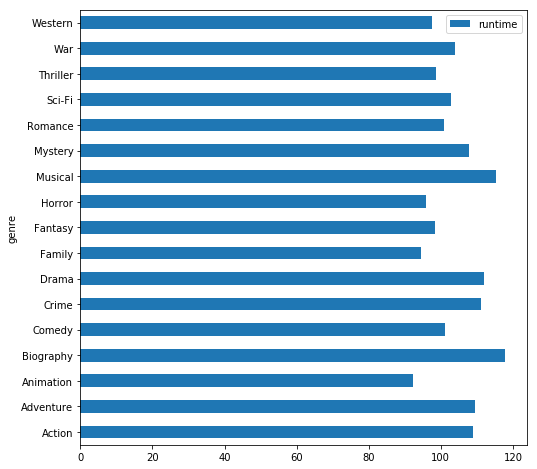

In [94]:
genreruntime = movies.groupby(['genre'])[['runtime']].mean().plot(kind = 'barh', figsize=(8,8))

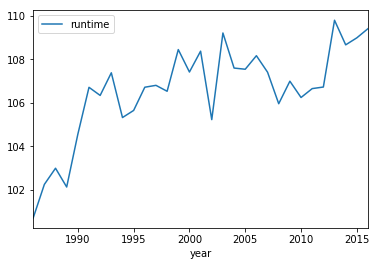

In [97]:
runtimeyears = movies.groupby(['year'])[['runtime']].mean()
runtimeyears.plot()

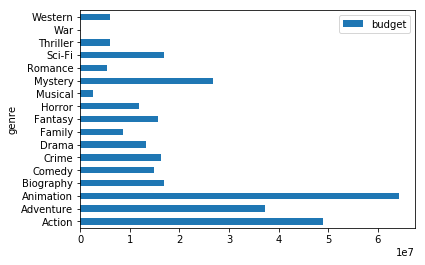

In [100]:
averagebudget = movies.groupby(['genre'])[['budget']].mean()
averagebudget.plot(kind = 'barh')

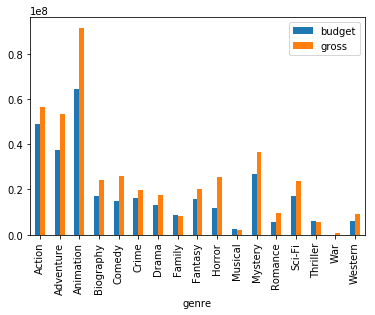

In [111]:
profit = movies.groupby(
    ['genre'])[['budget', 'gross']].mean()

profit.plot(kind = 'bar')
